In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("/content/Fraud.csv")
df = pd.DataFrame(data)
df = df[:50000]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB
None


In [ ]:
stats = df.describe(include='all')
print(stats)
print(df.info())

                step     type        amount     nameOrig  oldbalanceOrg  \
count   56203.000000    56203  5.620200e+04        56202   5.620200e+04   
unique           NaN        6           NaN        56202            NaN   
top              NaN  PAYMENT           NaN  C1231006815            NaN   
freq             NaN    24242           NaN            1            NaN   
mean        7.624451      NaN  1.598924e+05          NaN   7.322726e+05   
std         1.999414      NaN  3.293750e+05          NaN   2.184696e+06   
min         1.000000      NaN  6.300000e-01          NaN   0.000000e+00   
25%         8.000000      NaN  8.135660e+03          NaN   0.000000e+00   
50%         8.000000      NaN  3.623700e+04          NaN   1.788471e+04   
75%         9.000000      NaN  1.918409e+05          NaN   1.401448e+05   
max         9.000000      NaN  1.000000e+07          NaN   2.854724e+07   

        newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  \
count     5.620200e+04       

In [ ]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object


In [ ]:
print(df.isna())

        step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0      False  False   False     False          False           False   
1      False  False   False     False          False           False   
2      False  False   False     False          False           False   
3      False  False   False     False          False           False   
4      False  False   False     False          False           False   
...      ...    ...     ...       ...            ...             ...   
56198  False  False   False     False          False           False   
56199  False  False   False     False          False           False   
56200  False  False   False     False          False           False   
56201  False  False   False     False          False           False   
56202  False  False    True      True           True            True   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0         False           False           False    False    

In [ ]:
newdf = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB
None


In [ ]:
nullrow = df[df.isnull().any(axis=1)]
print(nullrow)

       step    type  amount nameOrig  oldbalanceOrg  newbalanceOrig nameDest  \
56202     9  PAYMEN     NaN      NaN            NaN             NaN      NaN   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
56202             NaN             NaN      NaN             NaN  


In [ ]:
rows_with_null = df['amount'].isnull()

# Use shift to find the rows immediately before rows with null values
rows_before_null = df[rows_with_null.shift(-1, fill_value=False)]

print(rows_before_null)

       step     type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
56201     9  PAYMENT  2955.89  C1632500548      466023.05       463067.17   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
56201  M363811903             0.0             0.0      0.0             0.0  


In [ ]:
nonulldf = df.fillna(0)
print(nonulldf.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  56203.000000  5.620300e+04   5.620300e+04    5.620300e+04   
mean       7.624451  1.598896e+05   7.322596e+05    7.464634e+05   
std        1.999414  3.293728e+05   2.184679e+06    2.222594e+06   
min        1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%        8.000000  8.135005e+03   0.000000e+00    0.000000e+00   
50%        8.000000  3.623455e+04   1.788300e+04    0.000000e+00   
75%        9.000000  1.918379e+05   1.401410e+05    1.534130e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    5.620300e+04    5.620300e+04  56203.000000         56203.0  
mean     8.391597e+05    1.169814e+06      0.001779             0.0  
std      2.407600e+06    2.893494e+06      0.042144             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [ ]:
transferTypes = df['type'].unique();
print(transferTypes)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN' 'PAYMEN']


In [ ]:
dupes = df.duplicated()
duperows = df[dupes]
print(duperows)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


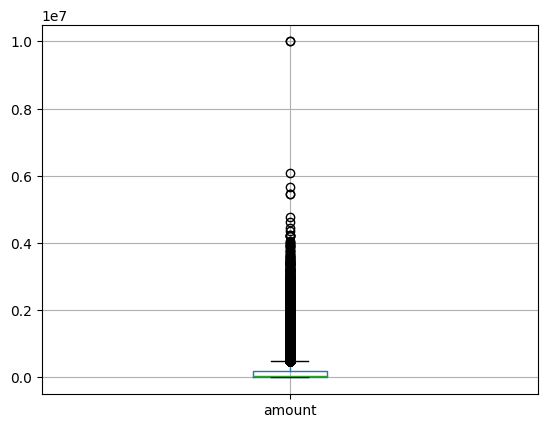

In [6]:
df.boxplot(column = 'amount')
plt.show()

In [10]:
print(newdf['amount'].median())
print(newdf['amount'].quantile([0.25,0.5,0.75,1]))

7615.625
0.25       3452.790
0.50       7615.625
0.75      58368.125
1.00    1724887.050
Name: amount, dtype: float64


[]

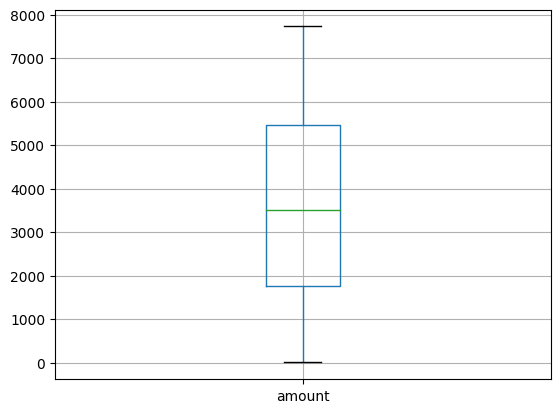

In [40]:
newdf = df[:]
halfdf = newdf[(newdf['amount']<=newdf['amount'].quantile(0.25))]
halfdf.boxplot(column='amount')
plt.plot()

[]

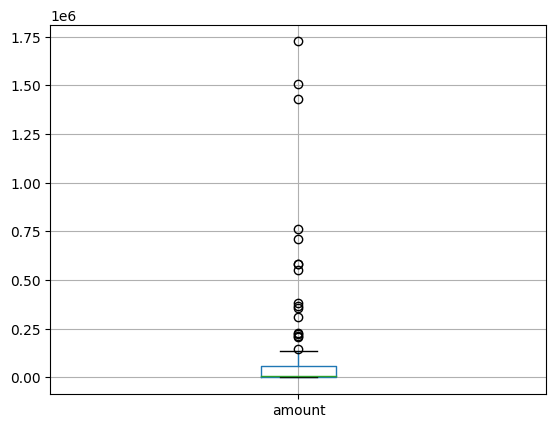

In [15]:
newdf = df[:100]
newdf.boxplot(column='amount')
plt.plot()

In [16]:
outliers = newdf[newdf['amount']>newdf['amount'].quantile()]
print(outliers)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [27]:
transferType = df['type'].unique()
print(transferType)

myMap = {}
for i in range(len(transferType)):
  myMap[transferType[i]]=i

mynewdf = df[:]
mynewdf['NumCategory'] = mynewdf['type'].map(myMap)

print(mynewdf.info())
print(mynewdf.head(10))

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
 11  NumCategory     50000 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 4.6+ MB
None
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       16029

<ipython-input-27-928b40ea7c78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynewdf['NumCategory'] = mynewdf['type'].map(myMap)


In [51]:
FraudData = df[df['isFraud']==1].drop('isFraud',axis=1)
NoFraudData = df[df['isFraud']==0].drop('isFraud',axis=1)
print(len(FraudData))
print(len(NoFraudData))

100
49900


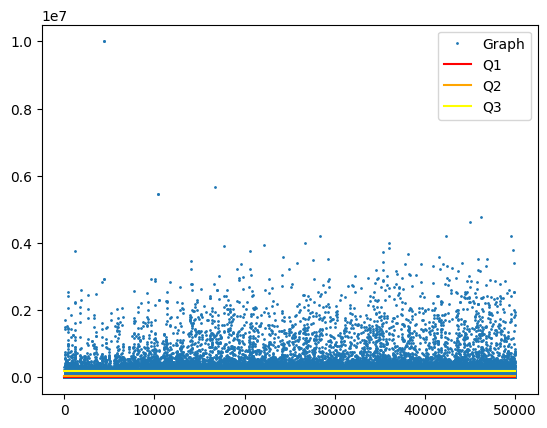

In [52]:
n = len(df['amount'])
plt.plot(range(n),df['amount'],'o',markersize=1,label="Graph")
Q1 = df['amount'].quantile(0.25)
Q2 = df['amount'].median()
Q3 = df['amount'].quantile(0.75)

plt.plot([0,n],[Q1,Q1],'-',color="red",label="Q1")
plt.plot([0,n],[Q2,Q2],'-',color="orange",label="Q2")
plt.plot([0,n],[Q3,Q3],'-',color="yellow",label="Q3")
plt.legend()
plt.show()

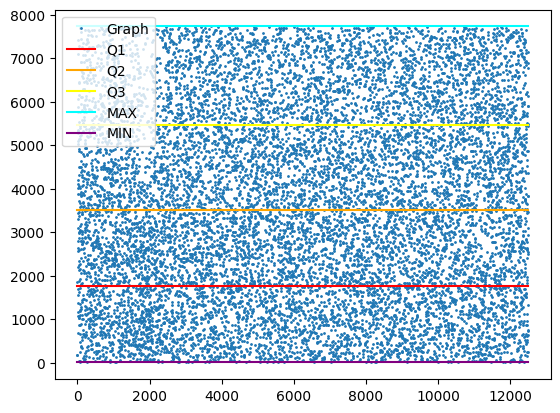

In [50]:
smalldf = df[df['amount']<=df['amount'].quantile(0.25)]
n = len(smalldf['amount'])
plt.plot(range(n),smalldf['amount'],'o',markersize=1,label="Graph")
Q1 = smalldf['amount'].quantile(0.25)
Q2 = smalldf['amount'].median()
Q3 = smalldf['amount'].quantile(0.75)
max = smalldf['amount'].max()
min = smalldf['amount'].min()

plt.plot([0,n],[Q1,Q1],'-',color="red",label="Q1")
plt.plot([0,n],[Q2,Q2],'-',color="orange",label="Q2")
plt.plot([0,n],[Q3,Q3],'-',color="yellow",label="Q3")
plt.plot([0,n],[max,max],'-',color="cyan",label="MAX")
plt.plot([0,n],[min,min],'-',color="purple",label="MIN")
x = plt.legend()
x.set_alpha(0.9)
plt.show()

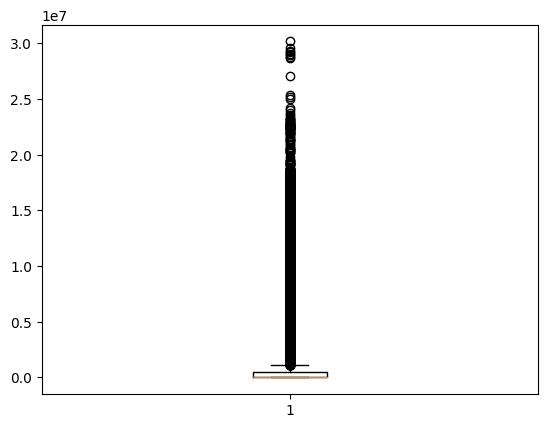

In [54]:
plt.boxplot(column=df['oldbalanceDest'])
plt.show()

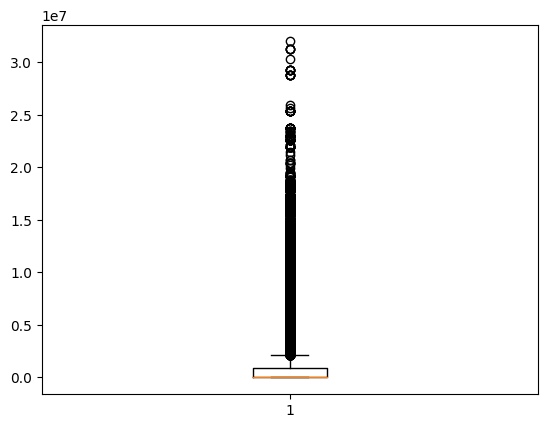

In [57]:
plt.boxplot(x=df['newbalanceDest'])
plt.show()

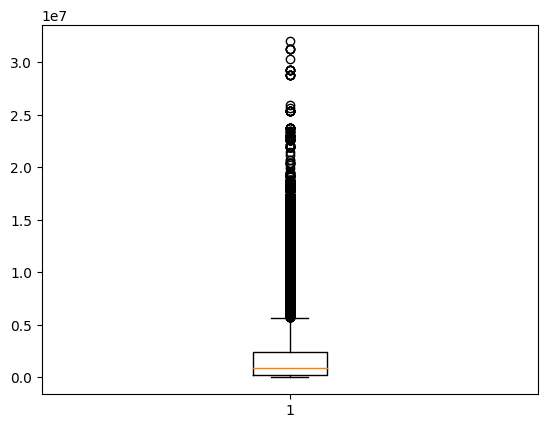

In [61]:
plt.boxplot(x=df[df['newbalanceDest']>0]['newbalanceDest'])
plt.show()

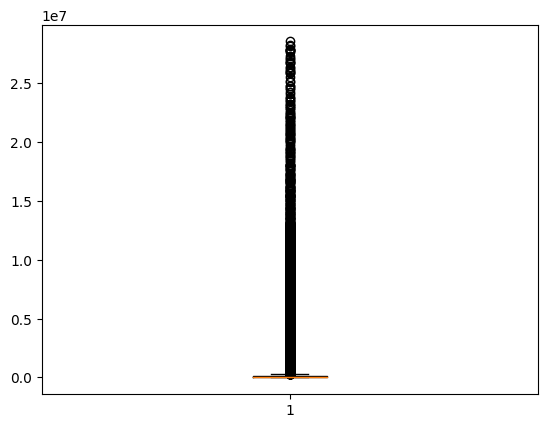

In [58]:
plt.boxplot(x=df['oldbalanceOrg'])
plt.show()

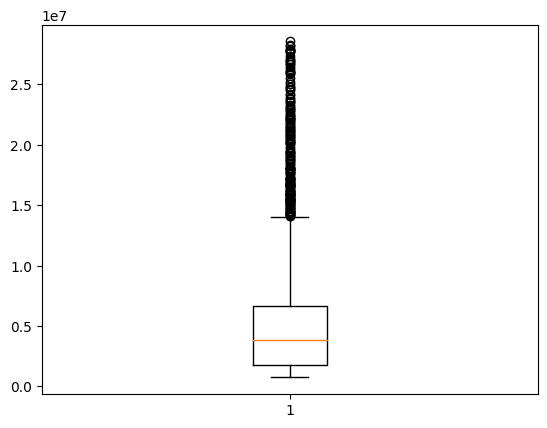

In [63]:
plt.boxplot(x=df[df['oldbalanceOrg']>df['oldba']]['oldbalanceOrg'])
plt.show()

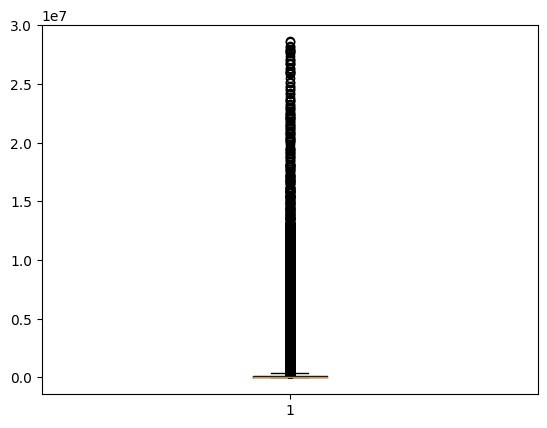

In [59]:
plt.boxplot(x=df['newbalanceOrig'])
plt.show()

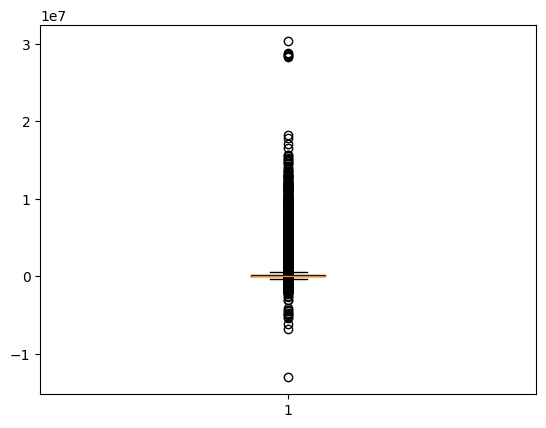

In [64]:
destChange = df['newbalanceDest'] - df['oldbalanceDest']
plt.boxplot(x=destChange)
plt.show()


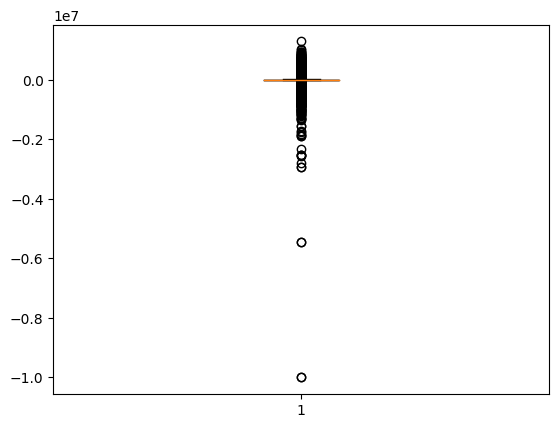

In [65]:
orgChange = df['newbalanceOrig']-df['oldbalanceOrg']
plt.boxplot(x=orgChange)
plt.show()

In [68]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  50000.000000  5.000000e+04   5.000000e+04    5.000000e+04   
mean       7.453800  1.562645e+05   7.333083e+05    7.472741e+05   
std        2.056636  3.243949e+05  

In [71]:
print(df['isFlaggedFraud'].value_counts())
print(df['isFraud'].value_counts())

0    50000
Name: isFlaggedFraud, dtype: int64
0    49900
1      100
Name: isFraud, dtype: int64
